# Linear  Regression


In [1]:
import pandas
import numpy 

In [2]:
import matplotlib.pyplot as plt
import seaborn

In [3]:
# to show the plot in the enviroment
%matplotlib inline

In [4]:
# import data set from csv file to 'dataset' variable 
dataset = pandas.read_csv('/content/USA_Housing.csv')

In [5]:
# to show first 5 rows from the data
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
# this shows to us about how many entries and how many columns the data has 
# also what type of data for each column 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
# quick account of statistics about data we have
dataset.describe()

In [8]:
# to show names of columns 
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
seaborn.pairplot(dataset)  

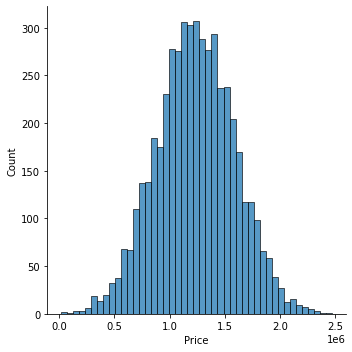

In [47]:
seaborn.displot(dataset['Price'])

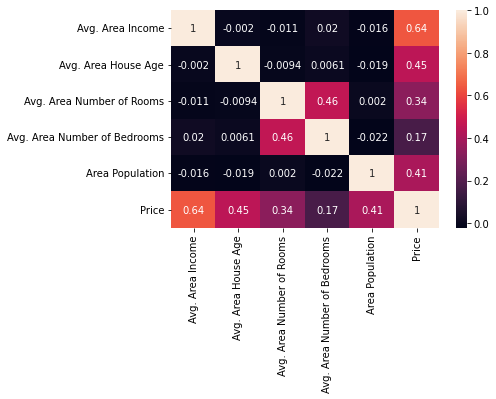

In [11]:
seaborn.heatmap(dataset.corr(),annot=True)

In [12]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
X= dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', ]]

In [14]:
y=dataset['Price']

In [15]:
import sklearn
if sklearn.__version__ > '0.18':
    from sklearn.model_selection import train_test_split
else:
    from sklearn.cross_validation import train_test_split

In [32]:
# random_state , ensure the random split how to choose the samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lr.intercept_)

-2640159.7968526958


In [21]:
lr.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [22]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [23]:
coefficient_dataframe = pandas.DataFrame(lr.coef_, X.columns, columns= ['Coeff'])

In [24]:
coefficient_dataframe 

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [25]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [27]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston ['DESCR'])

In [29]:
predictions = lr.predict(X_test)

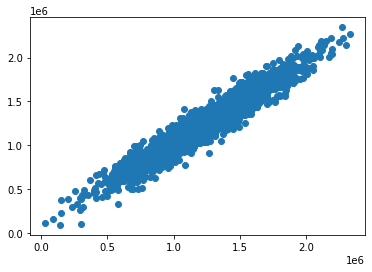

In [33]:
plt.scatter(y_test,predictions)

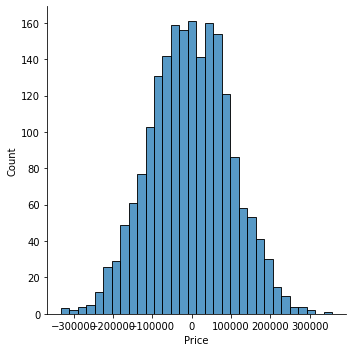

In [46]:
seaborn.displot((y_test-predictions))

In [42]:
from sklearn import metrics

In [43]:
metrics.median_absolute_error(y_test,predictions)

69764.78019159962

In [44]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208977

In [45]:
numpy.sqrt(metrics.mean_squared_error (y_test,predictions))

102278.82922290897